In [1]:
using Revise, LazySets, BenchmarkTools, Plots

┌ Info: Precompiling LazySets [b4f0291d-fe17-52bc-9479-3d1a343d9043]
└ @ Base loading.jl:1278
ERROR: LoadError: LoadError: UndefVarError: AbstractStarSet not defined
Stacktrace:
 [1] top-level scope at /home/sguadalupe/.julia/dev/LazySets/src/Sets/Star.jl:6
 [2] include(::Function, ::Module, ::String) at ./Base.jl:380
 [3] include at ./Base.jl:368 [inlined]
 [4] include(::String) at /home/sguadalupe/.julia/dev/LazySets/src/LazySets.jl:4
 [5] top-level scope at /home/sguadalupe/.julia/dev/LazySets/src/LazySets.jl:83
 [6] include(::Function, ::Module, ::String) at ./Base.jl:380
 [7] include(::Module, ::String) at ./Base.jl:368
 [8] top-level scope at none:2
 [9] eval at ./boot.jl:331 [inlined]
 [10] eval(::Expr) at ./client.jl:467
 [11] top-level scope at ./none:3
in expression starting at /home/sguadalupe/.julia/dev/LazySets/src/Sets/Star.jl:6
in expression starting at /home/sguadalupe/.julia/dev/LazySets/src/LazySets.jl:83


LoadError: Failed to precompile LazySets [b4f0291d-fe17-52bc-9479-3d1a343d9043] to /home/sguadalupe/.julia/compiled/v1.5/LazySets/NjrGc_i5uEA.ji.

In [24]:
zonos = []
for i=3:7
    push!(zonos, [rand(Zonotope, num_generators=i, dim=2) for i=1:10])
end

## Yupbank

In [29]:
bench = []
for i in zonos
    ts = []
    for Z in i
        t = @benchmark LazySets._vertices_list_2D($Z.center, $Z.generators, apply_convex_hull=false) samples=10
        t = minimum(t).time
        push!(ts, t)
    end
    push!(bench, min(ts...))
end

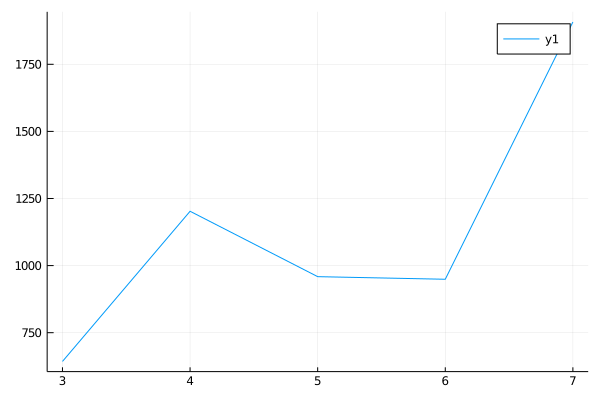

In [33]:
plot(3:7, bench)

## Master

In [27]:
bench2 = []
for i in zonos
    ts = []
    for Z in i
        t = @benchmark LazySets._vertices_list_2D($Z.center, $Z.generators, apply_convex_hull=false) samples=10
        t = minimum(t).time
        push!(ts, t)
    end
    push!(bench2, min(ts...))
end

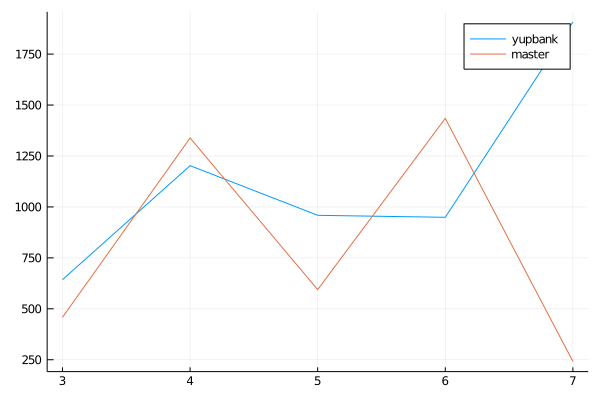

In [32]:
plot(3:7, bench, label="yupbank")
plot!(3:7, bench2, label="master")